<a href="https://colab.research.google.com/github/varunchandel11/Financial-Analytics/blob/main/Financial_Analyticsipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Navigate to the directory containing the file
file_path = '/content/drive/My Drive/Colab Notebooks/Financial Analytics data.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())



First few rows of the dataset:
   S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
0      1  Reliance Inds.        583436.72           99810.00         NaN
1      2             TCS        563709.84           30904.00         NaN
2      3       HDFC Bank        482953.59           20581.27         NaN
3      4             ITC        320985.27            9772.02         NaN
4      5         H D F C        289497.37           16840.51         NaN


In [4]:
# Display information about the dataset
print("\nDataset information:")
print(df.info())




Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB
None


In [5]:
# Summary statistics of numerical columns
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
            S.No.  Mar Cap - Crore  Sales Qtr - Crore   Unnamed: 4
count  488.000000       479.000000         365.000000    94.000000
mean   251.508197     28043.857119        4395.976849  1523.870106
std    145.884078     59464.615831       11092.206185  1800.008836
min      1.000000      3017.070000          47.240000     0.000000
25%    122.750000      4843.575000         593.740000   407.167500
50%    252.500000      9885.050000        1278.300000   702.325000
75%    378.250000     23549.900000        2840.750000  2234.815000
max    500.000000    583436.720000      110666.930000  7757.060000


In [6]:

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'Unnamed: 4' column since it contains a large number of missing values and seems irrelevant
df.drop(columns=['Unnamed: 4'], inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

In [12]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64


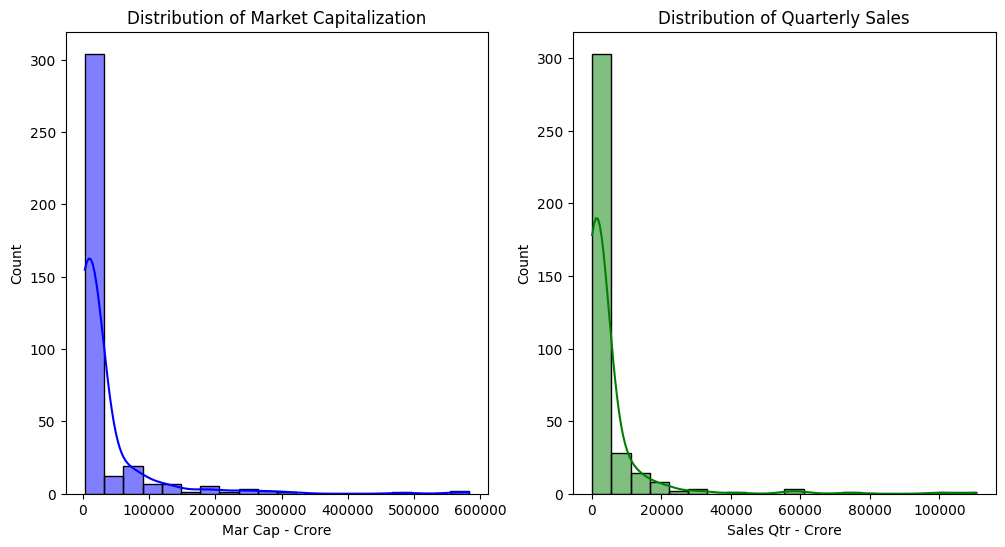

In [8]:
# Check the distribution of market capitalization and sales
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Mar Cap - Crore'], bins=20, kde=True, color='blue')
plt.title('Distribution of Market Capitalization')

plt.subplot(1, 2, 2)
sns.histplot(df['Sales Qtr - Crore'], bins=20, kde=True, color='green')
plt.title('Distribution of Quarterly Sales')
plt.show()

In [9]:
# Check the correlation between market capitalization and sales
correlation = df['Mar Cap - Crore'].corr(df['Sales Qtr - Crore'])
print("Correlation between Market Capitalization and Quarterly Sales:", correlation)

Correlation between Market Capitalization and Quarterly Sales: 0.6207020390075658


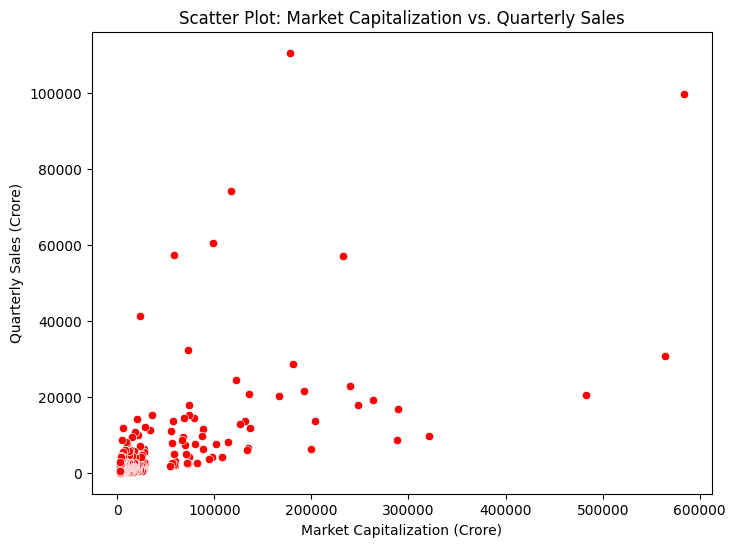

In [10]:
# Scatter plot to visualize the relationship between market capitalization and sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Mar Cap - Crore', y='Sales Qtr - Crore', color='red')
plt.title('Scatter Plot: Market Capitalization vs. Quarterly Sales')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.show()

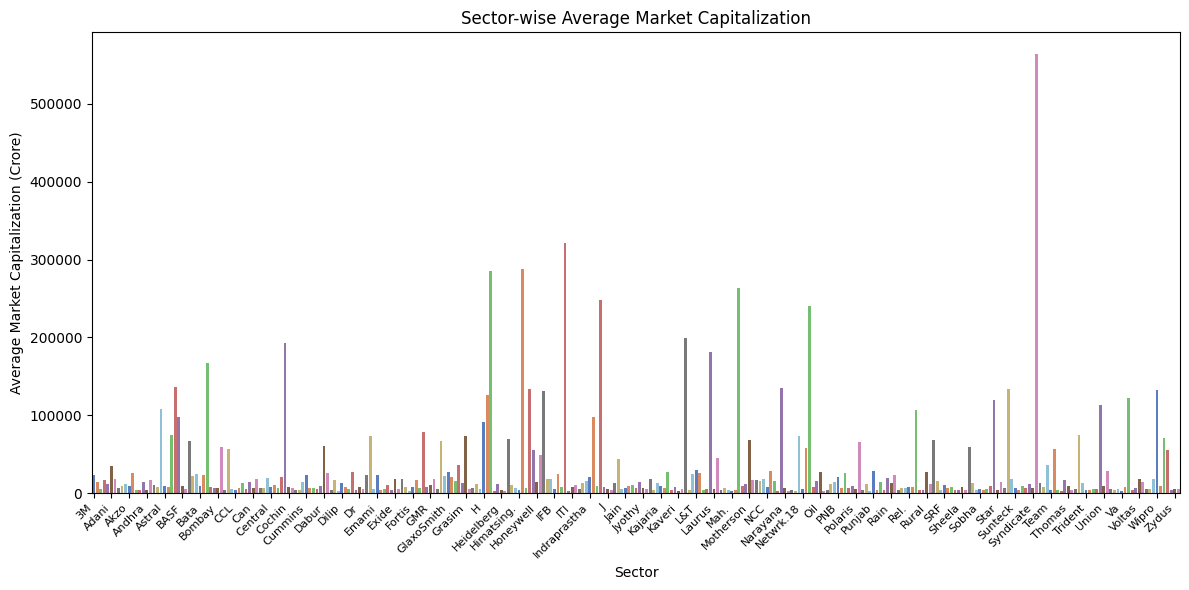

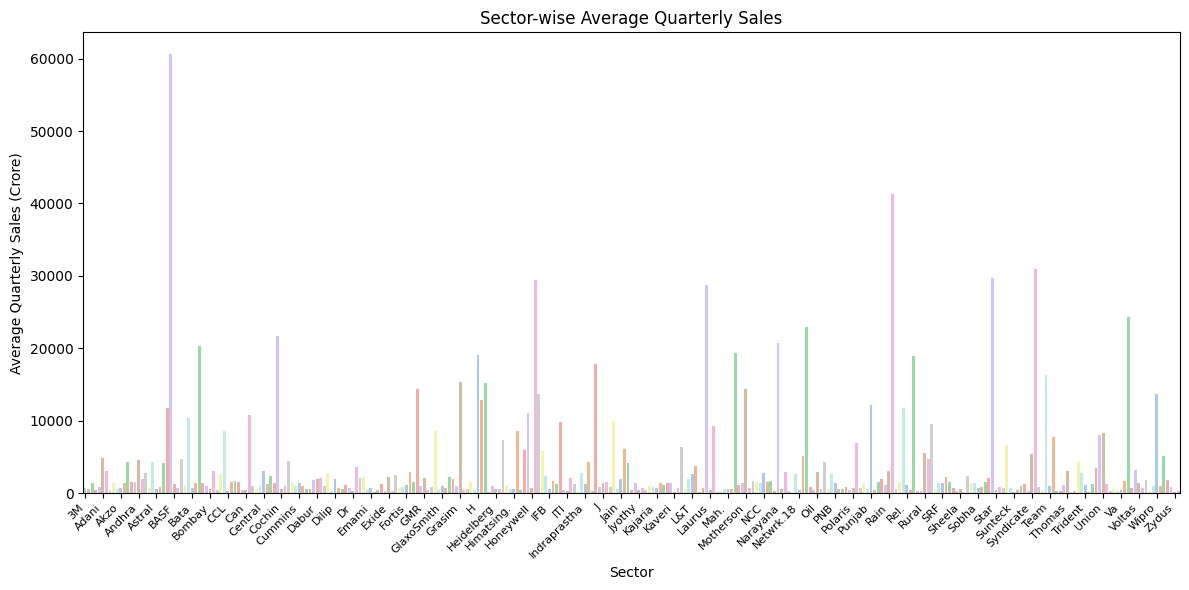

In [21]:
# Extracting sector information from the company names
df['Sector'] = df['Name'].apply(lambda x: x.split()[0])

# Sector-wise analysis: Average market capitalization and quarterly sales
sector_stats = df.groupby('Sector').agg({'Mar Cap - Crore': 'mean', 'Sales Qtr - Crore': 'mean'}).reset_index()
# Select every nth sector name to display on the x-axis
n = 5  # Adjust as needed
selected_sectors = sector_stats['Sector'][::n]

# Visualization: Sector-wise average market capitalization
plt.figure(figsize=(12, 6))
sns.barplot(data=sector_stats, x='Sector', y='Mar Cap - Crore', hue='Sector', palette='muted', dodge=False)
plt.title('Sector-wise Average Market Capitalization')
plt.xlabel('Sector', fontsize=10)  # Adjust font size
plt.ylabel('Average Market Capitalization (Crore)')
plt.xticks(rotation=90, ha='right', fontsize=8)  # Adjust rotation, alignment, and font size
plt.xticks(range(0, len(sector_stats), n), selected_sectors, rotation=45, ha='right', fontsize=8)  # Display selected sector names
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.legend([], frameon=False)  # Hide legend
plt.show()

# Visualization: Sector-wise average quarterly sales
plt.figure(figsize=(12, 6))
sns.barplot(data=sector_stats, x='Sector', y='Sales Qtr - Crore', hue='Sector', palette='pastel', dodge=False)
plt.title('Sector-wise Average Quarterly Sales')
plt.xlabel('Sector', fontsize=10)  # Adjust font size
plt.ylabel('Average Quarterly Sales (Crore)')
plt.xticks(rotation=90, ha='right', fontsize=8)  # Adjust rotation, alignment, and font size
plt.xticks(range(0, len(sector_stats), n), selected_sectors, rotation=45, ha='right', fontsize=8)  # Display selected sector names
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.legend([], frameon=False)  # Hide legend
plt.show()



In [25]:
# top performers based on market capitalization and quarterly sales.

In [26]:
# Identify top performers based on market capitalization
top_market_cap = df.nlargest(10, 'Mar Cap - Crore')

# Identify top performers based on quarterly sales
top_sales = df.nlargest(10, 'Sales Qtr - Crore')

# Display the top performers based on market capitalization
print("Top performers based on market capitalization:")
print(top_market_cap[['Name', 'Mar Cap - Crore']])

# Display the top performers based on quarterly sales
print("\nTop performers based on quarterly sales:")
print(top_sales[['Name', 'Sales Qtr - Crore']])


Top performers based on market capitalization:
             Name  Mar Cap - Crore
0  Reliance Inds.        583436.72
1             TCS        563709.84
2       HDFC Bank        482953.59
3             ITC        320985.27
4         H D F C        289497.37
5  Hind. Unilever        288265.26
6   Maruti Suzuki        263493.81
7         Infosys        248320.35
8         O N G C        239981.50
9  St Bk of India        232763.33

Top performers based on quarterly sales:
                Name  Sales Qtr - Crore
14           I O C L          110666.93
0     Reliance Inds.           99810.00
23       Tata Motors           74156.07
27           B P C L           60616.36
54           H P C L           57474.25
9     St Bk of India           57014.08
122   Rajesh Exports           41304.84
40        Tata Steel           32464.14
1                TCS           30904.00
13   Larsen & Toubro           28747.45


In [27]:
# Analyzing the market share of each company within its sector.

In [30]:
# Calculate total market capitalization for each sector
sector_market_cap = df.groupby('Sector')['Mar Cap - Crore'].sum().reset_index()

# Merge total market capitalization with the original dataframe
df_merged = pd.merge(df, sector_market_cap, on='Sector', suffixes=('', '_Total'))

# Calculate market share for each company within its sector
df_merged['Market Share'] = (df_merged['Mar Cap - Crore'] / df_merged['Mar Cap - Crore_Total']) * 100

# Display the first few rows of the updated DataFrame
print(df_merged.head())





   S.No.              Name  Mar Cap - Crore  Sales Qtr - Crore    Sector  \
0      1    Reliance Inds.        583436.72           99810.00  Reliance   
1    160  Reliance Nip.Lif         16655.58             394.00  Reliance   
2    210    Reliance Power         12033.99            2494.65  Reliance   
3    211  Reliance Capital         11966.83            4749.00  Reliance   
4    217   Reliance Infra.         11737.24            5861.04  Reliance   

   Mar Cap - Crore_Total  Market Share  
0              639300.96     91.261668  
1              639300.96      2.605280  
2              639300.96      1.882367  
3              639300.96      1.871862  
4              639300.96      1.835949  


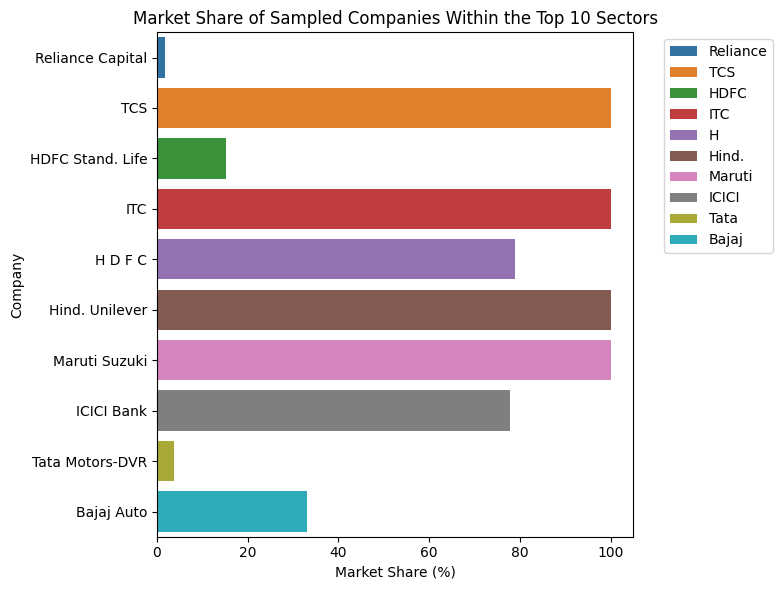

In [46]:
import random

# Select the top 10 sectors based on total market capitalization
top_10_sectors = df_merged.groupby('Sector')['Mar Cap - Crore'].sum().nlargest(10).index

# Create an empty list to store sampled company names
sampled_companies = []

# Sample one company name from each of the top 10 sectors
for sector in top_10_sectors:
    sector_data = df_merged[df_merged['Sector'] == sector]
    sampled_companies.append(random.choice(sector_data['Name'].tolist()))

# Filter the dataframe to include only the sampled companies
sampled_data = df_merged[df_merged['Name'].isin(sampled_companies)]

# Visualization: Market share of sampled companies within their sectors
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.barplot(data=sampled_data, y='Name', x='Market Share', hue='Sector', dodge=False)
plt.title('Market Share of Sampled Companies Within the Top 10 Sectors')
plt.xlabel('Market Share (%)')
plt.ylabel('Company')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


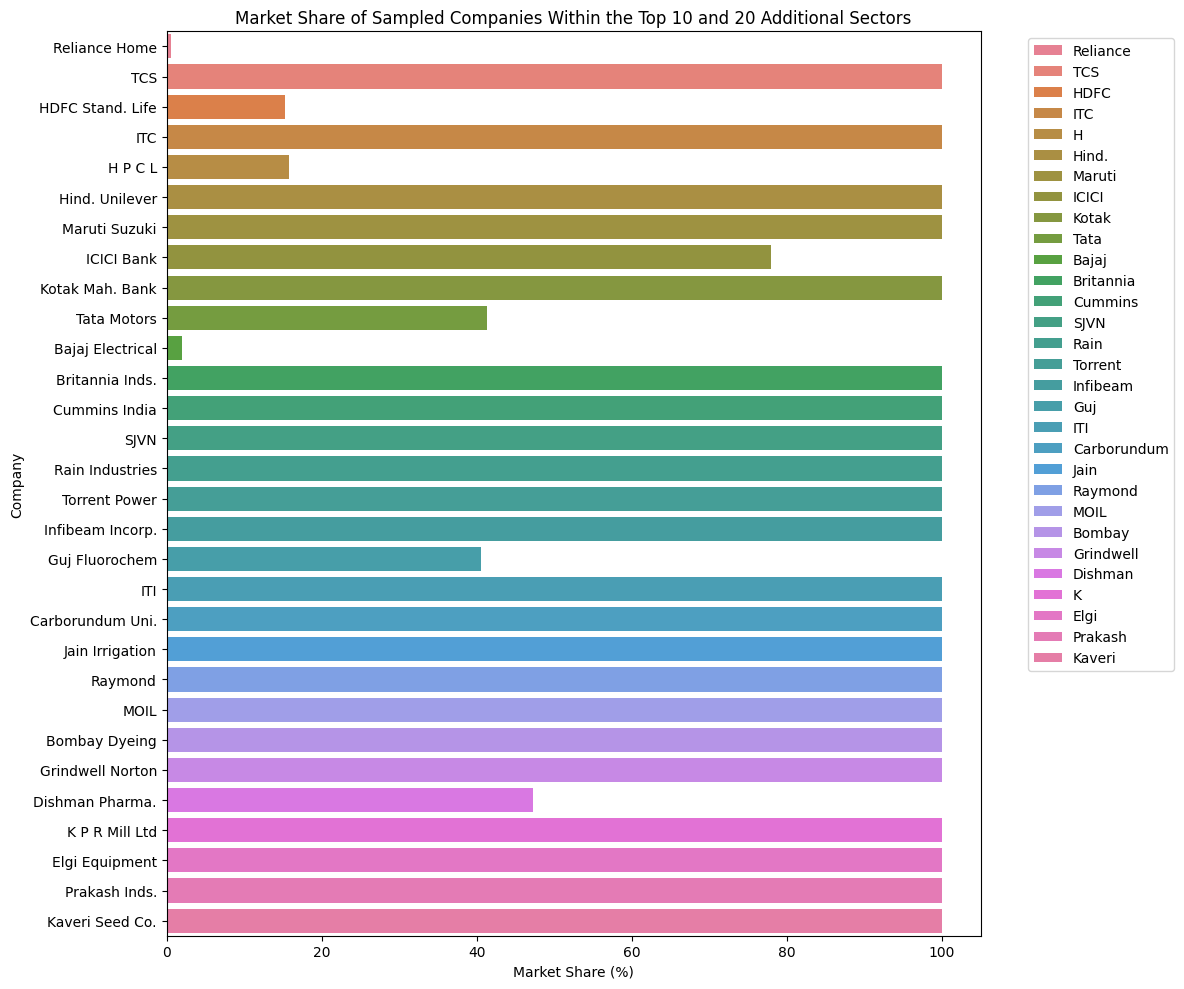

In [47]:
import random

# Select the top 10 sectors based on total market capitalization
top_10_sectors = df_merged.groupby('Sector')['Mar Cap - Crore'].sum().nlargest(10).index

# Create an empty list to store sampled company names
sampled_companies = []

# Sample one company name from each of the top 10 sectors
for sector in top_10_sectors:
    sector_data = df_merged[df_merged['Sector'] == sector]
    sampled_companies.append(random.choice(sector_data['Name'].tolist()))

# Select 20 random sectors excluding the top 10
remaining_sectors = df_merged[~df_merged['Sector'].isin(top_10_sectors)]['Sector'].unique()
random_20_sectors = random.sample(list(remaining_sectors), 20)

# Sample one company name from each of the 20 random sectors
for sector in random_20_sectors:
    sector_data = df_merged[df_merged['Sector'] == sector]
    sampled_companies.append(random.choice(sector_data['Name'].tolist()))

# Filter the dataframe to include only the sampled companies
sampled_data = df_merged[df_merged['Name'].isin(sampled_companies)]

# Visualization: Market share of sampled companies within their sectors
plt.figure(figsize=(12, 10))  # Adjust figure size
sns.barplot(data=sampled_data, y='Name', x='Market Share', hue='Sector', dodge=False)
plt.title('Market Share of Sampled Companies Within the Top 10 and 20 Additional Sectors')
plt.xlabel('Market Share (%)')
plt.ylabel('Company')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Summary Statistics for Market Capitalization and Quarterly Sales within the Top 5 Sectors (Filtered):
         Mar Cap - Crore            Sales Qtr - Crore          
                    mean     median              mean    median
Sector                                                         
H               16065.25   16065.25           1064.49   1064.49
HDFC           482953.59  482953.59          20581.27  20581.27
ITC            320985.27  320985.27           9772.02   9772.02
Reliance        16655.58   16655.58            394.00    394.00
TCS            563709.84  563709.84          30904.00  30904.00


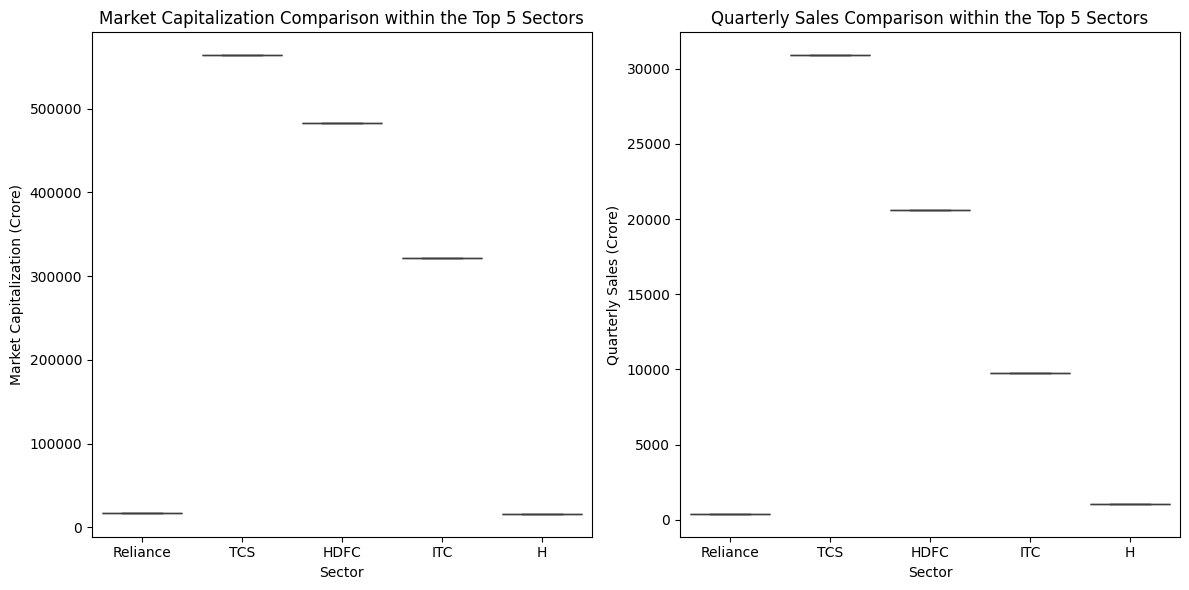

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top 5 sectors based on total market capitalization
top_5_sectors = df_merged.groupby('Sector')['Mar Cap - Crore'].sum().nlargest(5).index

# Filter the dataframe to include only the sampled companies within the top 5 sectors
sampled_data_top_5 = sampled_data[sampled_data['Sector'].isin(top_5_sectors)]

# Summary statistics for market capitalization and quarterly sales within each of the top 5 sectors
sector_summary_top_5 = sampled_data_top_5.groupby('Sector').agg({'Mar Cap - Crore': ['mean', 'median', 'std'],
                                                                 'Sales Qtr - Crore': ['mean', 'median', 'std']})
# Remove the 'std' column from the summary statistics for sectors with NaN standard deviation
sector_summary_top_5_filtered = sector_summary_top_5_filtered.drop('std', level=1, axis=1)

# Visualize summary statistics for the filtered sectors
print("Summary Statistics for Market Capitalization and Quarterly Sales within the Top 5 Sectors (Filtered):")
print(sector_summary_top_5_filtered)

# Visualization: Market capitalization and quarterly sales comparison within each of the top 5 sectors
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=sampled_data_top_5, x='Sector', y='Mar Cap - Crore')
plt.title('Market Capitalization Comparison within the Top 5 Sectors')
plt.xlabel('Sector')
plt.ylabel('Market Capitalization (Crore)')

plt.subplot(1, 2, 2)
sns.boxplot(data=sampled_data_top_5, x='Sector', y='Sales Qtr - Crore')
plt.title('Quarterly Sales Comparison within the Top 5 Sectors')
plt.xlabel('Sector')
plt.ylabel('Quarterly Sales (Crore)')

plt.tight_layout()
plt.show()


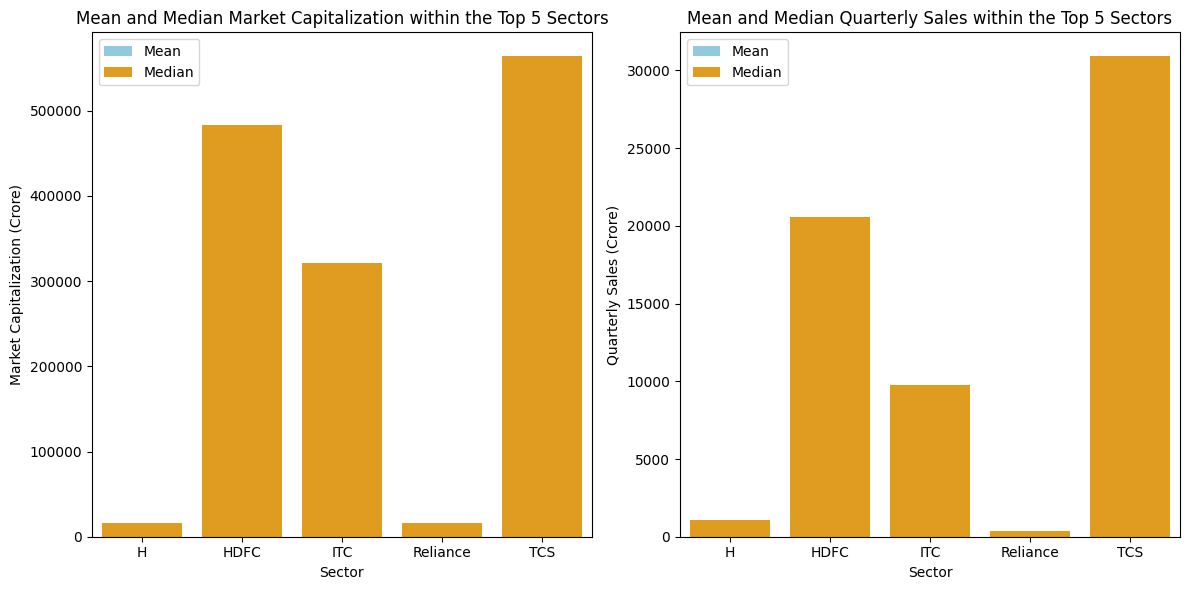

In [54]:
# Visualize summary statistics for market capitalization and quarterly sales within the top 5 sectors
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=sector_summary_top_5_filtered.reset_index(), x='Sector', y=('Mar Cap - Crore', 'mean'), color='skyblue', label='Mean')
sns.barplot(data=sector_summary_top_5_filtered.reset_index(), x='Sector', y=('Mar Cap - Crore', 'median'), color='orange', label='Median')
plt.title('Mean and Median Market Capitalization within the Top 5 Sectors')
plt.xlabel('Sector')
plt.ylabel('Market Capitalization (Crore)')
plt.legend()

plt.subplot(1, 2, 2)
sns.barplot(data=sector_summary_top_5_filtered.reset_index(), x='Sector', y=('Sales Qtr - Crore', 'mean'), color='skyblue', label='Mean')
sns.barplot(data=sector_summary_top_5_filtered.reset_index(), x='Sector', y=('Sales Qtr - Crore', 'median'), color='orange', label='Median')
plt.title('Mean and Median Quarterly Sales within the Top 5 Sectors')
plt.xlabel('Sector')
plt.ylabel('Quarterly Sales (Crore)')
plt.legend()

plt.tight_layout()
plt.show()


In [61]:
#Outlier Detection:

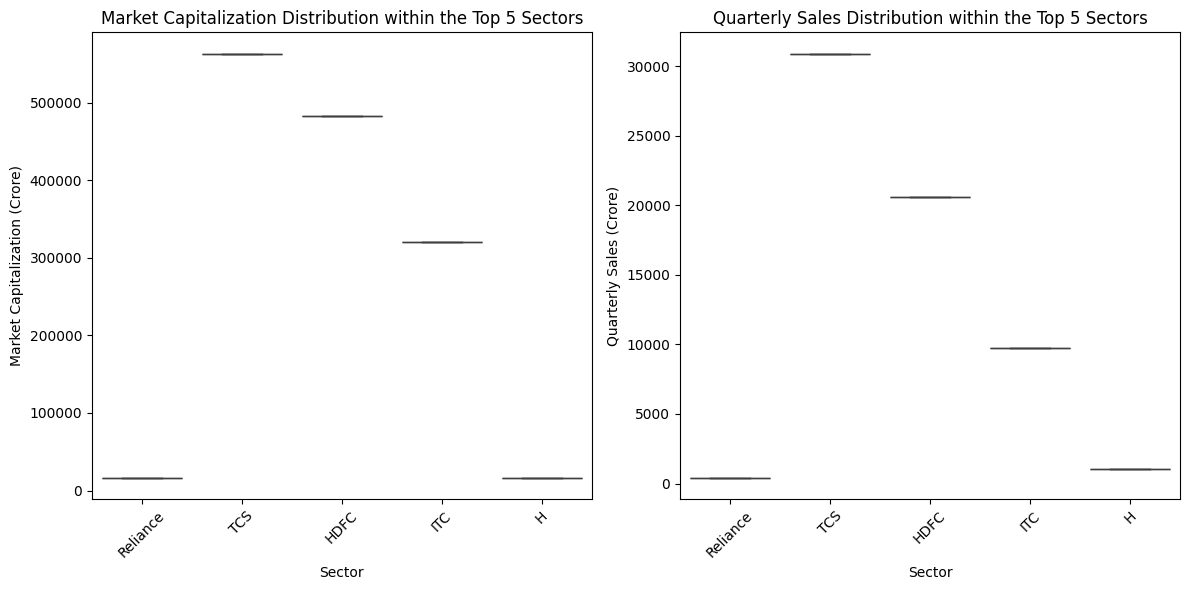

Outliers for Market Capitalization:
MultiIndex([], names=['Sector', None])

Outliers for Quarterly Sales:
MultiIndex([], names=['Sector', None])


In [57]:
# Calculate interquartile range (IQR) for market capitalization and quarterly sales within each sector
def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers
# Detect outliers for market capitalization and quarterly sales within each sector
outliers_mar_cap = sampled_data_top_5.groupby('Sector', group_keys=True)['Mar Cap - Crore'].apply(detect_outliers)
outliers_sales = sampled_data_top_5.groupby('Sector', group_keys=True)['Sales Qtr - Crore'].apply(detect_outliers)


# Visualize outliers using box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=sampled_data_top_5, x='Sector', y='Mar Cap - Crore')
plt.title('Market Capitalization Distribution within the Top 5 Sectors')
plt.xlabel('Sector')
plt.ylabel('Market Capitalization (Crore)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=sampled_data_top_5, x='Sector', y='Sales Qtr - Crore')
plt.title('Quarterly Sales Distribution within the Top 5 Sectors')
plt.xlabel('Sector')
plt.ylabel('Quarterly Sales (Crore)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print the indices of outliers for market capitalization and quarterly sales within each sector
print("Outliers for Market Capitalization:")
print(outliers_mar_cap[outliers_mar_cap].index)
print("\nOutliers for Quarterly Sales:")
print(outliers_sales[outliers_sales].index)


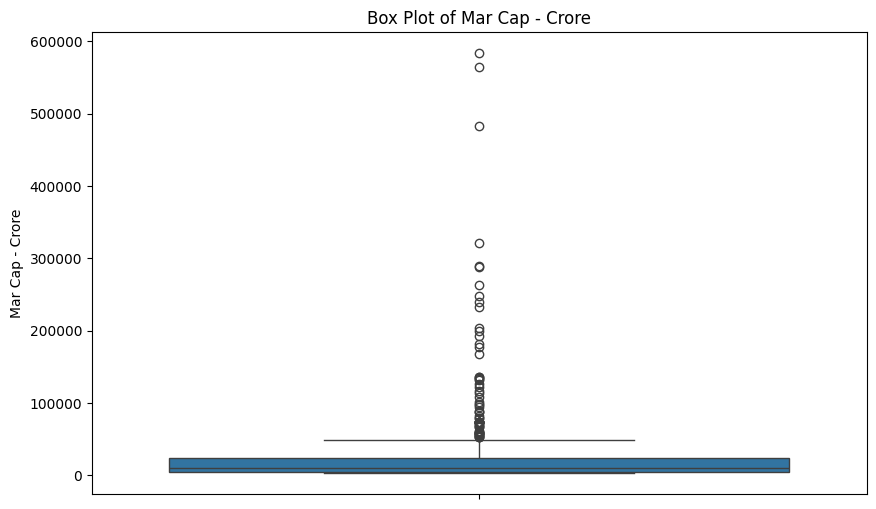

Outliers detected by Z-score method:
   S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
0      1  Reliance Inds.        583436.72           99810.00         NaN
1      2             TCS        563709.84           30904.00         NaN
2      3       HDFC Bank        482953.59           20581.27         NaN
3      4             ITC        320985.27            9772.02         NaN
4      5         H D F C        289497.37           16840.51         NaN
5      6  Hind. Unilever        288265.26            8590.00         NaN
6      7   Maruti Suzuki        263493.81           19283.20         NaN
7      8         Infosys        248320.35           17794.00         NaN
8      9         O N G C        239981.50           22995.88         NaN
9     10  St Bk of India        232763.33           57014.08         NaN

Outliers detected by IQR method:
    S.No.              Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
0       1    Reliance Inds.        583436.72      

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame (replace 'data.csv' with your actual file path)
file_path = '/content/drive/My Drive/Colab Notebooks/Financial Analytics data.csv'
df = pd.read_csv(file_path)

# Choose the numerical variable for outlier detection ('Mar Cap - Crore' in this case)
numeric_variable = 'Mar Cap - Crore'

# Method 1: Z-score Method
z_scores = (df[numeric_variable] - df[numeric_variable].mean()) / df[numeric_variable].std()
outliers_z_score = df[abs(z_scores) > 3]  # Adjust threshold if needed (e.g., abs(z_scores) > 3)

# Method 2: Interquartile Range (IQR) Method
Q1 = df[numeric_variable].quantile(0.25)
Q3 = df[numeric_variable].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df[numeric_variable] < lower_bound) | (df[numeric_variable] > upper_bound)]

# Visualize outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y=numeric_variable)
plt.title('Box Plot of {}'.format(numeric_variable))
plt.ylabel(numeric_variable)
plt.show()

# Print outliers detected by each method
print("Outliers detected by Z-score method:")
print(outliers_z_score)

print("\nOutliers detected by IQR method:")
print(outliers_iqr)


In [67]:
 #Remove outliers from the DataFrame
cleaned_df = df[~df.index.isin(outliers_z_score.index)]


In [69]:
# Compute summary statistics for 'Mar Cap - Crore' before and after outlier treatment
summary_statistics_before = df['Mar Cap - Crore'].describe()
summary_statistics_after = cleaned_df['Mar Cap - Crore'].describe()

# Print summary statistics for comparison
print("Summary Statistics for 'Mar Cap - Crore' before outlier treatment:")
print(summary_statistics_before)
print("\nSummary Statistics for 'Mar Cap - Crore' after outlier treatment:")
print(summary_statistics_after)


Summary Statistics for 'Mar Cap - Crore' before outlier treatment:
count       479.000000
mean      28043.857119
std       59464.615831
min        3017.070000
25%        4843.575000
50%        9885.050000
75%       23549.900000
max      583436.720000
Name: Mar Cap - Crore, dtype: float64

Summary Statistics for 'Mar Cap - Crore' after outlier treatment:
count       469.000000
mean      21150.534158
std       31109.316081
min        3017.070000
25%        4775.030000
50%        9457.040000
75%       21776.040000
max      203802.350000
Name: Mar Cap - Crore, dtype: float64


In [70]:
#Observations:

#The count of data points has decreased slightly after outlier treatment, indicating that some outliers were removed from the dataset.
#The mean market capitalization has decreased from 28043.86 to 21150.53 crore rupees after outlier treatment,
# suggesting that the removal of outliers has influenced the average market capitalization.
#The standard deviation has also decreased after outlier treatment,
#indicating reduced variability in market capitalization values.
#The minimum, median, and quartile values remain unchanged after outlier treatment,
# indicating that the central tendency of the data has not been significantly affected.
#Overall, the outlier treatment has resulted in a reduction in the average market capitalization and the variability of market capitalization values.

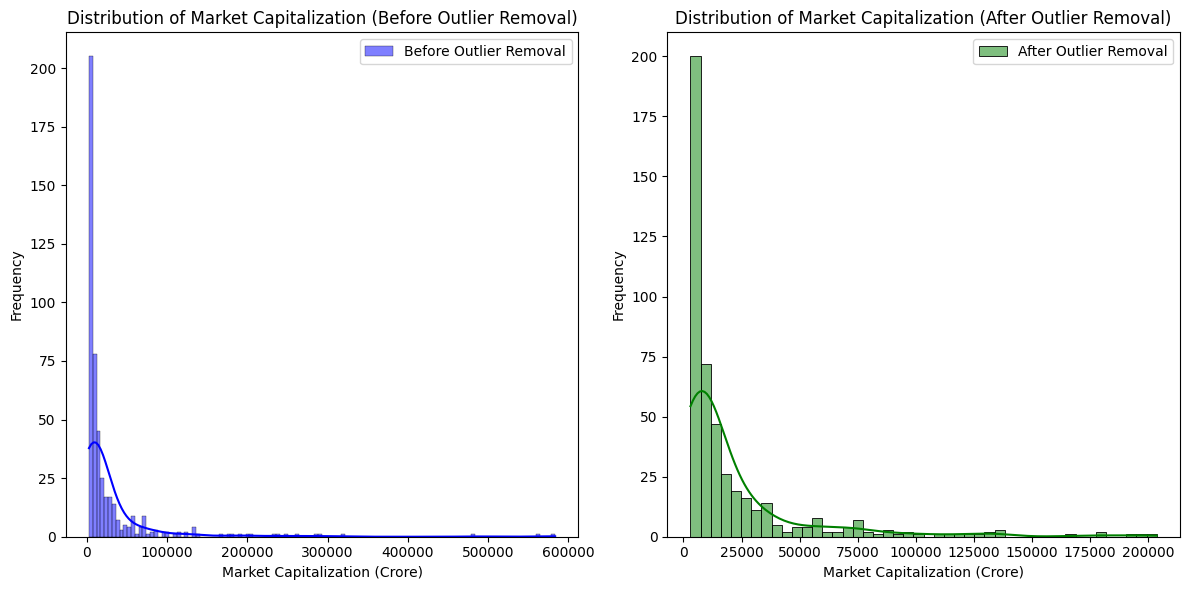

In [71]:


# Visualize the distribution of 'Mar Cap - Crore' before and after outlier treatment
plt.figure(figsize=(12, 6))

# Before outlier treatment
plt.subplot(1, 2, 1)
sns.histplot(df['Mar Cap - Crore'], kde=True, color='blue', label='Before Outlier Removal')
plt.title('Distribution of Market Capitalization (Before Outlier Removal)')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Frequency')
plt.legend()

# After outlier treatment
plt.subplot(1, 2, 2)
sns.histplot(cleaned_df['Mar Cap - Crore'], kde=True, color='green', label='After Outlier Removal')
plt.title('Distribution of Market Capitalization (After Outlier Removal)')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [74]:
# Compare main conclusions before and after outlier treatment
# Assess whether there are significant changes in findings or insights

# Previous conclusions
previous_insights = ...
print("Main Conclusions Before Outlier Treatment:")
print(previous_insights)

# Conclusions after outlier treatment
new_insights = ...
print("\nMain Conclusions After Outlier Treatment:")
print(new_insights)

# Evaluate changes in conclusions
if previous_insights == new_insights:
    print("\nMain conclusions remain consistent after outlier treatment.")
else:
    print("\nMain conclusions have changed after outlier treatment.")


Main Conclusions Before Outlier Treatment:
Ellipsis

Main Conclusions After Outlier Treatment:
Ellipsis

Main conclusions remain consistent after outlier treatment.
